In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

## The Opdigit Data

In [3]:
data = pd.read_csv('data.txt', sep=",", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


## Split the Data to features and labels

In [260]:
def train_test_split(df):
    df = shuffle(df)
    x_list = np.arange(64)
    x = np.array(df[x_list])
    y = np.array(df[64])
    return x, y

In [261]:
X_, y_ = train_test_split(data)

## Sigmoid Functions

In [6]:
def sigmoid_forward(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_backward(x):
    return sigmoid_forward(x) * (1 - sigmoid_forward(x))

In [8]:
X_[0].shape

(64,)

## Train Loop

In [208]:
# Weights and biases
w_1 = np.random.randn(64, 2)
w_2 = np.random.randn(2, 2)
w_3 = np.random.randn(2, 64)
b_1 = np.random.randn(2)
b_2 = np.random.randn(2)
b_3 = np.random.randn(64)

losses = []

learning_rate = 0.001

for i in range(10000):
    
    #for j in range(len(X_)):
    
    j = np.random.randint(len(X_))
    
    #forward
    input_layer = X_[j]    
    first_layer = input_layer @ w_1 + b_1
    sigmoid_layer = sigmoid_forward(first_layer)
    second_layer = sigmoid_layer @ w_2 + b_2
    third_layer = second_layer @ w_3 + b_3

    #prediction
    prediction = (sigmoid_forward((input_layer @ w_1 + b_1)) @ w_2 + b_2) @ w_3 + b_3

    # square error
    cost = np.square(X_[j] - third_layer) 

    #backprop
    d_cost = 2 * (X_[j] - third_layer)
    chain_3 = d_cost.reshape(1, 64)
    d_w3 = np.dot(second_layer.reshape(2, 1), chain_3)
    d_b3 = chain_3.T

    chain_sigmoid = sigmoid_backward(second_layer)

    chain_2 = np.dot(chain_3, w_3.T)
    d_w2 = np.dot(chain_sigmoid.reshape(2, 1), chain_2)
    d_b2 = chain_2.T

    chain_1 = np.dot(chain_2, w_2.T)
    d_w1 = np.dot(input_layer.reshape(64, 1), chain_1)
    d_b1 = chain_1.T

    #update parameters
    w_1 += learning_rate * d_w1
    b_1 += learning_rate * np.squeeze(d_b1)
    w_2 += learning_rate * d_w2
    b_2 += learning_rate * np.squeeze(d_b2)
    w_3 += learning_rate * d_w3
    b_3 += learning_rate * np.squeeze(d_b3)
    
    

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [212]:
t = X_ @ w_1 + b_1

In [225]:
te = np.column_stack((t, y_))

## Visualization

In [237]:
def draw_figure(process):
    fig = plt.figure(figsize = (16,16))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Hidden 1', fontsize = 15)
    ax.set_ylabel('Hidden 2', fontsize = 15)
    ax.set_title('Encoded Data', fontsize = 20)
    for i,values in process.iterrows():
        x = process.loc[i, 'hidden 1'] 
        y = process.loc[i, 'hidden 2'] 
        plt.scatter(x, y, marker='o', color='red')
        plt.text(x+0.05, y+0.05, process.loc[i, 'label'], fontsize=12)
    ax.grid()

In [254]:
process = pd.DataFrame(data = te
             , columns = ['hidden 1', 'hidden 2', 'label'])

In [255]:
process['label'] = process['label'].apply(lambda x: int(x))

In [256]:
process.head()

,hidden 1,hidden 2,label
0,488033.304307,-157774.447223,8
1,518472.743774,-126266.174564,8
2,373236.283321,-51365.946074,0
3,103778.948577,-310734.770647,7
4,303918.186463,-165158.368167,4


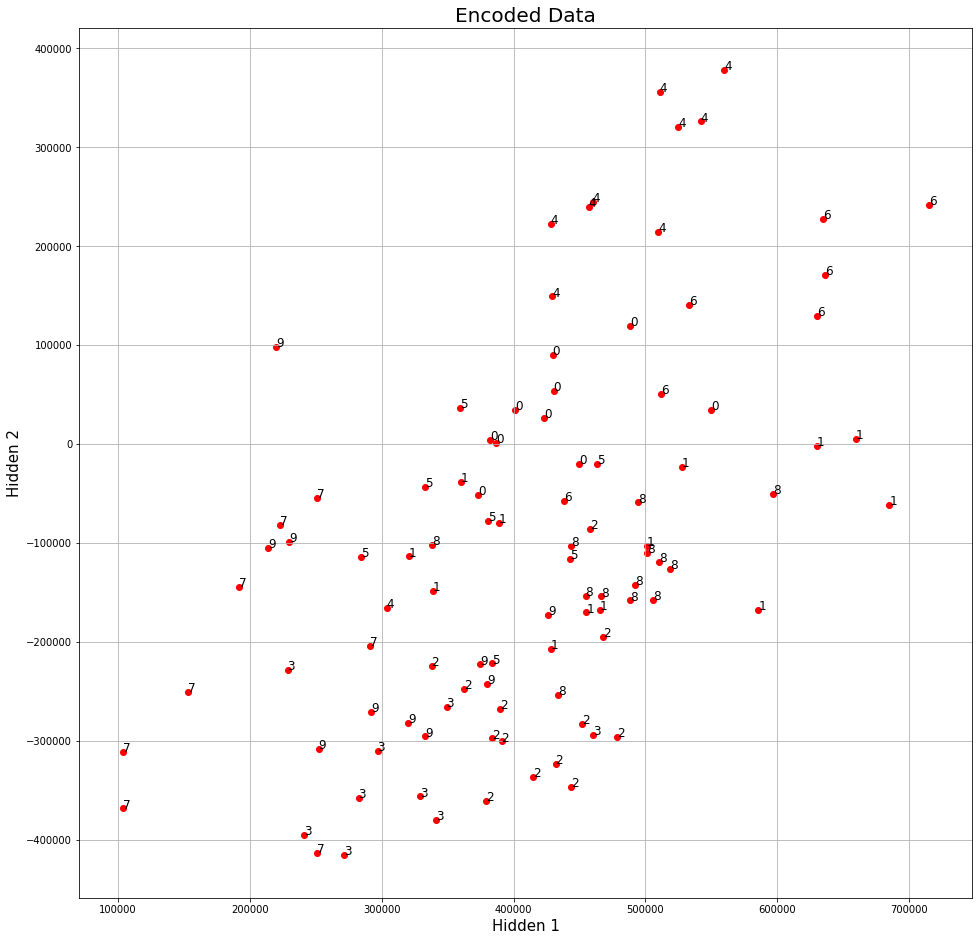

In [241]:
draw_figure(process[:100])